In [1]:
from glob import glob
import urllib
import earthaccess
from satpy.scene import Scene

/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# functions to download data (just organizing stuff)
def download_files():
    for short_name in ["VNP02MOD", "VNP02IMG", "VNP02DNB", "VNP03MOD", "VNP03IMG", "VNP03DNB"]:
        results = earthaccess.search_data(
        short_name=short_name, 
        cloud_hosted=True, 
        bounding_box=(-160.0, 73.0, -130.0, 77.0),
        temporal=("2022-10-07", "2022-10-10"),
        count=10)
        earthaccess.download(results, './')

In [3]:
earthaccess.login()
download_files()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
No .netrc found in /home/jovyan


Enter your Earthdata Login username:  daltonks
Enter your Earthdata password:  ········


You're now authenticated with NASA Earthdata Login
Using token with expiration date: 10/08/2023
Using user provided credentials for EDL
Granules found: 80
 Getting 10 granules, approx download size: 1.15 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 1155.46it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 55553.70it/s]


Granules found: 80
 Getting 10 granules, approx download size: 1.48 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 1331.74it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:16<00:00,  1.60s/it]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 84392.43it/s]


Granules found: 82
 Getting 10 granules, approx download size: 0.37 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 1009.95it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 89240.51it/s]


Granules found: 80
 Getting 10 granules, approx download size: 0.5 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 1150.80it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 118483.16it/s]


Granules found: 80
 Getting 10 granules, approx download size: 1.61 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 906.23it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:44<00:00,  4.47s/it]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 120525.98it/s]


Granules found: 82
 Getting 10 granules, approx download size: 0.62 GB


QUEUEING TASKS | : 100%|██████████| 10/10 [00:00<00:00, 1055.70it/s]
PROCESSING TASKS | : 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
COLLECTING RESULTS | : 100%|██████████| 10/10 [00:00<00:00, 91379.17it/s]


In [5]:
from datatree import open_datatree


for file in glob('*VNP*nc'):
    dt = open_datatree(file)
    print(file,dt.attrs['DayNightFlag'])

VNP02DNB.A2022280.0818.002.2022280174641.nc Both
VNP03MOD.A2022280.1006.001.2022280174658.nc Night
VNP03DNB.A2022280.0818.001.2022280162323.nc Both
VNP03IMG.A2022280.1000.001.2022280174704.nc Both
VNP02DNB.A2022280.0130.001.2022280084330.nc Both
VNP03DNB.A2022280.0124.001.2022280080859.nc Day
VNP03DNB.A2022280.1006.001.2022280174658.nc Night
VNP02MOD.A2022280.1006.001.2022280180434.nc Night
VNP02IMG.A2022280.1000.001.2022280180432.nc Both
VNP02MOD.A2022280.1000.002.2022280193057.nc Both
VNP02DNB.A2022280.0130.002.2022280095910.nc Both
VNP02MOD.A2022280.1142.002.2022280191449.nc Both
VNP03IMG.A2022280.1142.001.2022280174700.nc Both
VNP02IMG.A2022280.0124.002.2022280095811.nc Day
VNP02IMG.A2022280.1142.001.2022280180434.nc Both
VNP03DNB.A2022280.1000.001.2022280174704.nc Both
VNP03IMG.A2022280.1142.002.2022280185554.nc Both
VNP02IMG.A2022280.1142.002.2022280191449.nc Both
VNP03MOD.A2022280.1142.001.2022280174700.nc Both
VNP03MOD.A2022280.0124.002.2022280092500.nc Day
VNP03IMG.A2022280.01

In [6]:
fileglob="A2022280.0124"

scn = Scene(filenames=glob('*VNP*' + fileglob + '*nc'), reader='viirs_l1b')
scn.load(['true_color_lowres'])
local_scene=scn.resample(resampler='native')
local_scene.save_dataset('true_color_lowres', filename=fileglob + '.png')

/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/dask/array/chunk.py:278: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)
/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/dask/array/chunk.py:278: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)


In [7]:
ds = scn.to_xarray()

for i in ['longitude', 'latitude']:
    print(i,ds[i].min().values, ds[i].max().values)

/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/satpy/writers/cf_writer.py:920: UserWarning: Coordinate "m_lon" referenced by dataarray true_color_lowres does not exist, dropping reference.
  link_coords(dict_dataarrays)
/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/satpy/writers/cf_writer.py:920: UserWarning: Coordinate "m_lat" referenced by dataarray true_color_lowres does not exist, dropping reference.
  link_coords(dict_dataarrays)


longitude -179.99991 179.99991
latitude 48.02945 75.770584


In [13]:
ds1 = ds.isel(x=slice(None,None,20), y=slice(None,None,20))
ds1

<xarray.Dataset>
Dimensions:            (bands: 3, y: 324, x: 160)
Coordinates:
  * bands              (bands) <U1 'R' 'G' 'B'
    longitude          (y, x) float32 dask.array<chunksize=(162, 160), meta=np.ndarray>
    latitude           (y, x) float32 dask.array<chunksize=(162, 160), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    true_color_lowres  (bands, y, x) float64 dask.array<chunksize=(1, 162, 160), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2023-08-10 22:36:37.567633
    Conventions:  CF-1.7

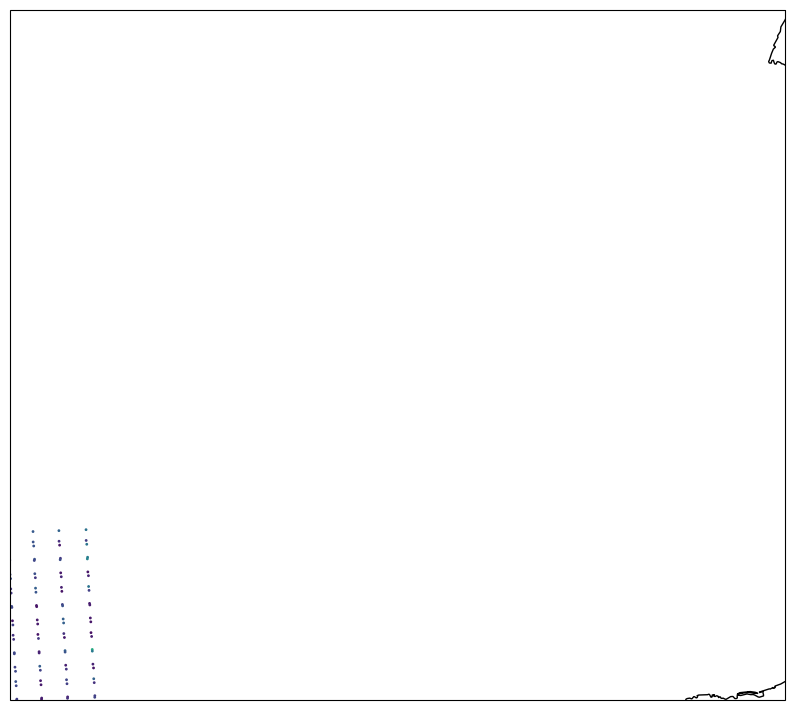

In [27]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=[10,10], subplot_kw={'projection':ccrs.NorthPolarStereo(central_longitude=179.9)})
ax.scatter(ds1.longitude,ds1.latitude, c=ds1.true_color_lowres[0], transform=ccrs.PlateCarree(),s=1)
# ax.pcolor(ds1.longitude,ds1.latitude, ds1.true_color_lowres[0], transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_extent([-160,-130,73,77], crs=ccrs.PlateCarree())
                        

In [24]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/.conda/envs/sea-ice-oscillations/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py
Type:      method